import required Modules

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("realest.csv")
dataset.head(3)

,Price,Bedroom,Space,Room,Lot,Tax,Bathroom,Garage,Condition
0,53.0,2.0,967.0,5.0,39.0,652.0,1.5,0.0,0.0
1,55.0,2.0,815.0,5.0,33.0,1000.0,1.0,2.0,1.0
2,56.0,3.0,900.0,5.0,35.0,897.0,1.5,1.0,0.0


In [3]:
dataset.shape

(157, 9)

check NULL Values

In [4]:
dataset.isnull().sum()

Price         1
Bedroom       1
Space        11
Room          1
Lot          11
Tax          10
Bathroom      1
Garage        1
Condition     1
dtype: int64

In [5]:
dataset = dataset.dropna()

In [6]:
dataset.isnull().sum()

Price        0
Bedroom      0
Space        0
Room         0
Lot          0
Tax          0
Bathroom     0
Garage       0
Condition    0
dtype: int64

Check Linearity of Dataset

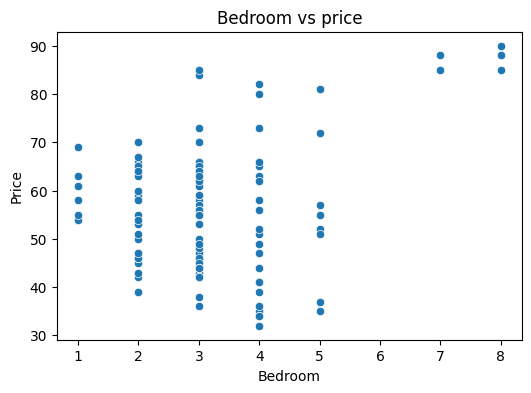

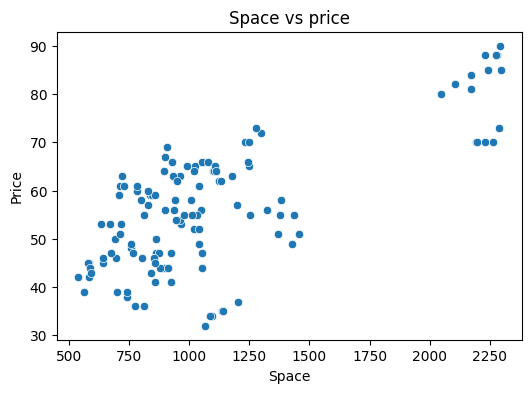

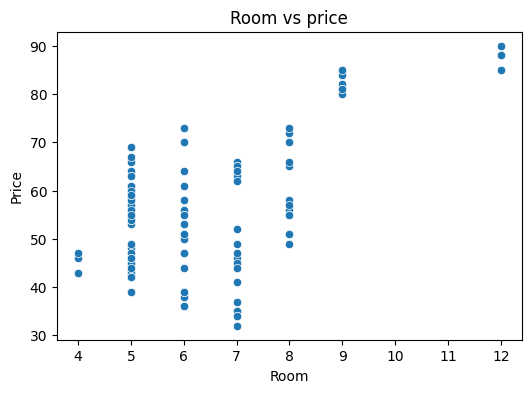

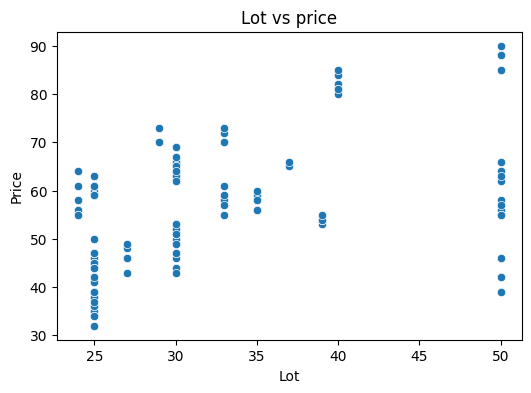

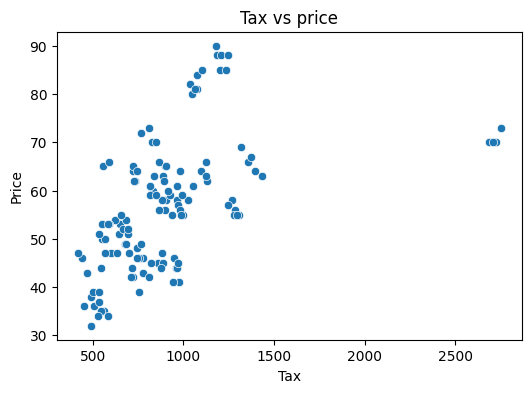

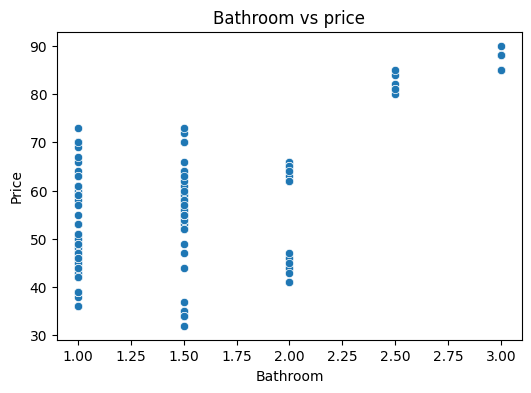

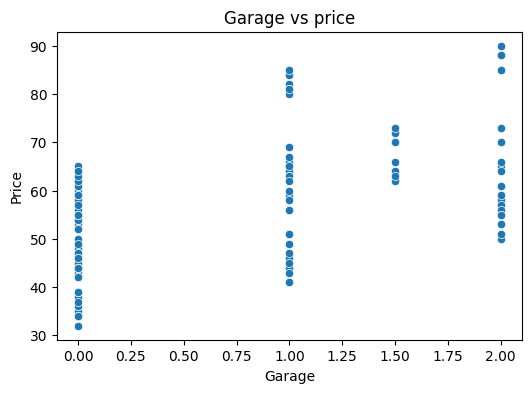

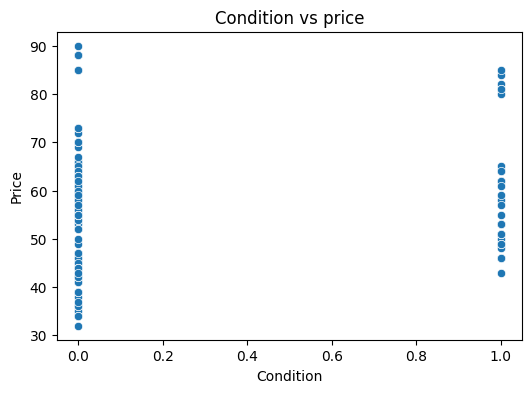

In [7]:
for column in dataset.columns:
    if column != 'Price':
        plt.figure(figsize=(6,4))
        sns.scatterplot(x=dataset[column],y=dataset['Price'])
        plt.title(f'{column} vs price')
        plt.show()

import RandomForestRegressor for non linear relationships

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [9]:
x = dataset.drop(columns=['Price'])
y = dataset['Price']

split data in train test split and fit RFR

In [10]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size = 0.2,random_state=42)

In [11]:
model = RandomForestRegressor(n_estimators=100,random_state=42)
model.fit(x_train,y_train)

RandomForestRegressor(random_state=42)

In [12]:
y_pred = model.predict(x_test)

check R2 Score on test set


In [13]:
model.score(x_test,y_test)*100

94.93761210623842

Testing

In [15]:
new_house = [[2.0,967.0,5.0,39.0,652.0,1.5,0.0,0.0]]
pred_price = model.predict(new_house)
(f"Predicted Price is :{pred_price[0]}")

C:\Users\PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


'Predicted Price is :53.35'